In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

def read_ans(filename):
    # Read the content of the answer text file and store it as a list of lines
    with open(filename, 'r') as file:
        answer_lines = file.readlines()
    print(len(answer_lines))
    a = np.zeros((len(answer_lines),4))
    i = 0
    for line in answer_lines:
        a[i, :] = [int(char) for char in line.strip()]  # Convert each character to an integer
        i += 1  # Increment the row index
    da = np.diff(a)
    da[da > 1] = 1
    da[da < 1] = -1
    return [a,da]

def score_IME(filename,a,da):
    # Read the content of the answer text file and store it as a list of lines
    with open(filename, 'r') as file:
        response = file.readlines()
    r = np.zeros((len(response),4))
    i = 0
    for line in response:
        r[i, :] = [int(char) for char in line.strip()]  # Convert each character to an integer
        i += 1  # Increment the row index
    dr = np.diff(r)
    dr_er = da - dr
    r_er = a - r
    return [dr_er,r_er]

def score(filename,a,da):
    # Read the content of the answer text file and store it as a list of lines
    with open(filename, 'r') as file:
        response = file.readlines()
    r = np.zeros((len(response),4))
    i = 0
    for line in response:
        r[i, :] = [int(char) for char in line.strip()]  # Convert each character to an integer
        i += 1  # Increment the row index
    dr = np.diff(r)
    dr[dr > 1] = 1
    dr[dr < 1] = -1
    r_ex = np.sum(a == r,axis = 1)
    r_chg = np.sum(da == dr,axis = 1)
    return [r_ex,r_chg]

def summary(r_ex,r_chg):
    output = np.zeros((8))
    if len(r_ex) == 60:
        output[0] = np.sum(r_ex[0:19])
        output[1] = np.sum(r_ex[20:39])
        output[2] = np.sum(r_ex[40:59])
        output[4] = np.sum(r_chg[0:19])
        output[5] = np.sum(r_chg[20:39])
        output[6] = np.sum(r_chg[40:59])
    else:
        output[0] = np.sum(r_ex[0:16])
        output[1] = np.sum(r_ex[17:36])
        output[2] = np.sum(r_ex[37:56])
        output[4] = np.sum(r_chg[0:16])
        output[5] = np.sum(r_chg[17:36])
        output[6] = np.sum(r_chg[37:56])
    output[3] = np.sum(r_ex)
    output[7] = np.sum(r_chg)        
    return output

def summary_porcentage(df):
    df['eAir'] = (df['eAir'] / 68) * 100
    df['eVib'] = (df['eVib'] / 80) * 100
    df['eCar'] = (df['eCar'] / 80) * 100
    df['eAll'] = (df['eAll'] / 228) * 100
    df['dAir'] = (df['dAir'] / 51) * 100
    df['dVib'] = (df['dVib'] / 60) * 100
    df['dCar'] = (df['dCar'] / 60) * 100
    df['dAll'] = (df['dAll'] / 171) * 100
    return df

def summary_porcentage_60r(df):
    df['eAir'] = (df['eAir'] / 80)  * 100
    df['eVib'] = (df['eVib'] / 80)  * 100
    df['eCar'] = (df['eCar'] / 80)  * 100
    df['eAll'] = (df['eAll'] / 240) * 100
    df['dAir'] = (df['dAir'] / 60)  * 100
    df['dVib'] = (df['dVib'] / 60)  * 100
    df['dCar'] = (df['dCar'] / 60)  * 100
    df['dAll'] = (df['dAll'] / 180) * 100
    return df

57


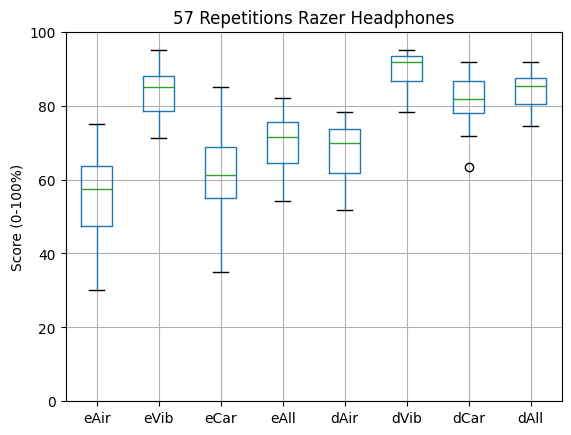

In [5]:
# %%
df = pd.DataFrame(columns=["ID", "eAir", "eVib", "eCar", "eAll", "dAir", "dVib", "dCar", "dAll"])
[answer_razer, answer_diffs_razer] = read_ans("D:\\shared_git\\MaestriaThesis\\data\\ANSWERSHEET_Razer.txt")
for folder_id in range(13,50):
    try:
        if folder_id not in [0,1,2,3,4,5,6,7,8,9,10,11]:
            [r_ex,r_chg] = score(f"D:\\shared_git\\MaestriaThesis\\data\\ID{folder_id:02d}\\R_ID{folder_id:02d}.txt",answer_razer,answer_diffs_razer)
            output = summary(r_ex,r_chg)
            output = np.hstack((folder_id,output.T))
            df.loc[folder_id] = output
    except:
        df.loc[folder_id] = np.zeros(9) 


df = df[(df != 0).all(axis=1)]
df.reset_index(drop=True, inplace=True)
df = summary_porcentage_60r(df)
df.to_csv("Scores_razer.csv")
df.boxplot(column=["eAir", "eVib", "eCar", "eAll", "dAir", "dVib", "dCar", "dAll"])

# Set the title and labels
plt.title("57 Repetitions Razer Headphones")
plt.ylabel("Score (0-100%)")
plt.ylim(0, 100)

# Show the box plot 
plt.show()

In [9]:
print(df)

      ID   eAir   eVib   eCar       eAll       dAir       dVib       dCar  \
0   13.0  38.75  75.00  43.75  54.166667  51.666667  86.666667  76.666667   
1   14.0  53.75  83.75  56.25  67.083333  66.666667  86.666667  75.000000   
2   15.0  41.25  87.50  55.00  64.166667  61.666667  93.333333  83.333333   
3   16.0  58.75  87.50  61.25  71.666667  71.666667  95.000000  81.666667   
4   17.0  47.50  87.50  68.75  70.000000  58.333333  91.666667  81.666667   
5   18.0  60.00  82.50  75.00  76.666667  66.666667  91.666667  86.666667   
6   19.0  51.25  77.50  47.50  60.416667  70.000000  85.000000  73.333333   
7   20.0  40.00  85.00  70.00  67.500000  55.000000  90.000000  90.000000   
8   21.0  58.75  92.50  55.00  73.750000  75.000000  95.000000  81.666667   
9   22.0  51.25  87.50  48.75  64.583333  66.666667  93.333333  80.000000   
10  23.0  71.25  80.00  65.00  76.250000  76.666667  90.000000  86.666667   
11  24.0  63.75  90.00  61.25  76.666667  75.000000  91.666667  80.000000   

In [42]:
output_ex = np.zeros((57,4))
output_chg = np.zeros((57,3))

print(output_ex.shape)
df = pd.DataFrame(columns=["ID", "eAir", "eVib", "eCar", "eAll", "dAir", "dVib", "dCar", "dAll"])
[answer_razer, answer_diffs_razer] = read_ans("D:\\shared_git\\MaestriaThesis\\data\\ANSWERSHEET_Razer.txt")

for folder_id in range(12,50):
    file_path = f"D:\\shared_git\\MaestriaThesis\\data\\ID{folder_id:02d}\\R_ID{folder_id:02d}.txt"
    if os.path.exists(file_path):
        try:
            [r_ex,r_chg] = score_IME(file_path,answer_razer,answer_diffs_razer)
            output_ex = np.hstack(( output_ex,r_ex))
            output_chg = np.hstack((output_ex,r_chg))
        except Exception as e:
            print(f'Error while processing: {str(e)}')
    else:
        print(f"The file {file_path} does not exist.")

output_ex = output_ex[:,4:]
print(np.max(output_ex))

(57, 4)
57
The file D:\shared_git\MaestriaThesis\data\ID32\R_ID32.txt does not exist.
The file D:\shared_git\MaestriaThesis\data\ID36\R_ID36.txt does not exist.
The file D:\shared_git\MaestriaThesis\data\ID43\R_ID43.txt does not exist.
The file D:\shared_git\MaestriaThesis\data\ID48\R_ID48.txt does not exist.
The file D:\shared_git\MaestriaThesis\data\ID49\R_ID49.txt does not exist.
5.0


In [ ]:
flattened_answer_razer = [item for sublist in answer_razer for item in sublist]
flattened_answer_razer = [int(x) for x in flattened_answer_razer]

new_list = ['A'] * 17 + ['B'] * 20 + ['C'] * 20
result = [f"{x}{y}" for x, y in zip(new_list,flattened_answer_razer)]
print(result)


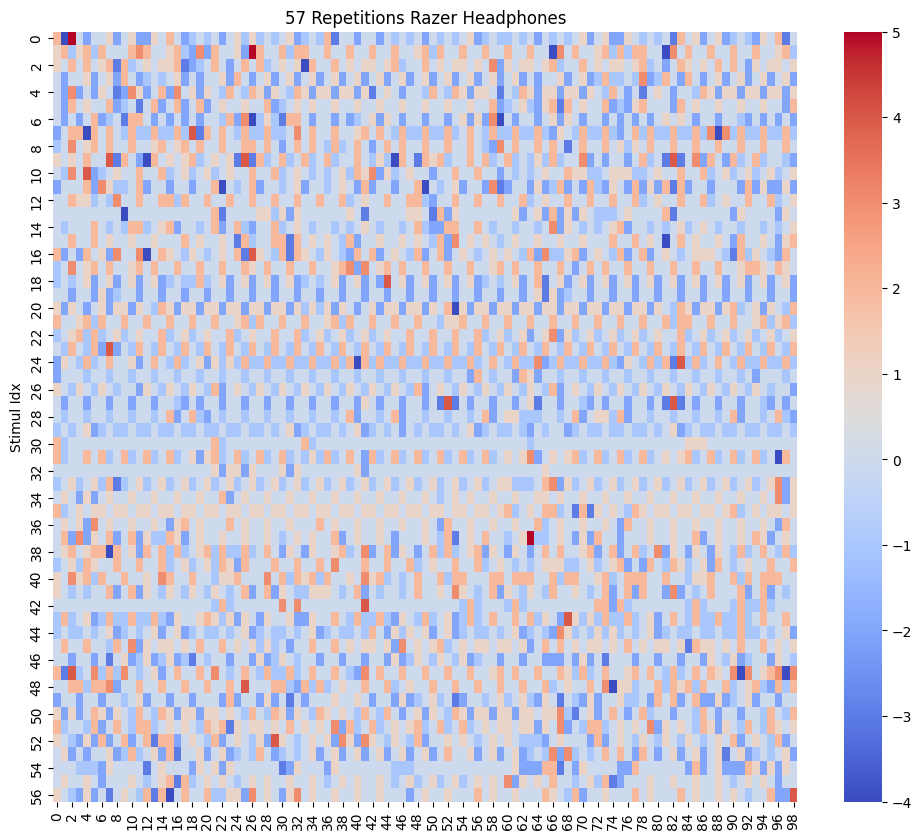

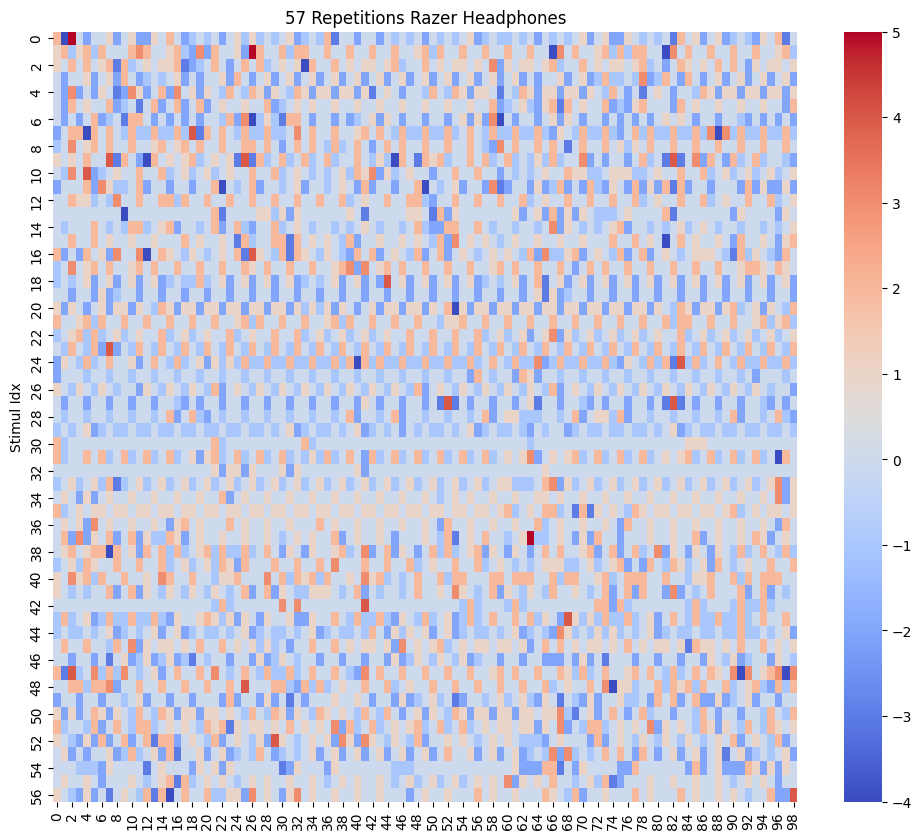

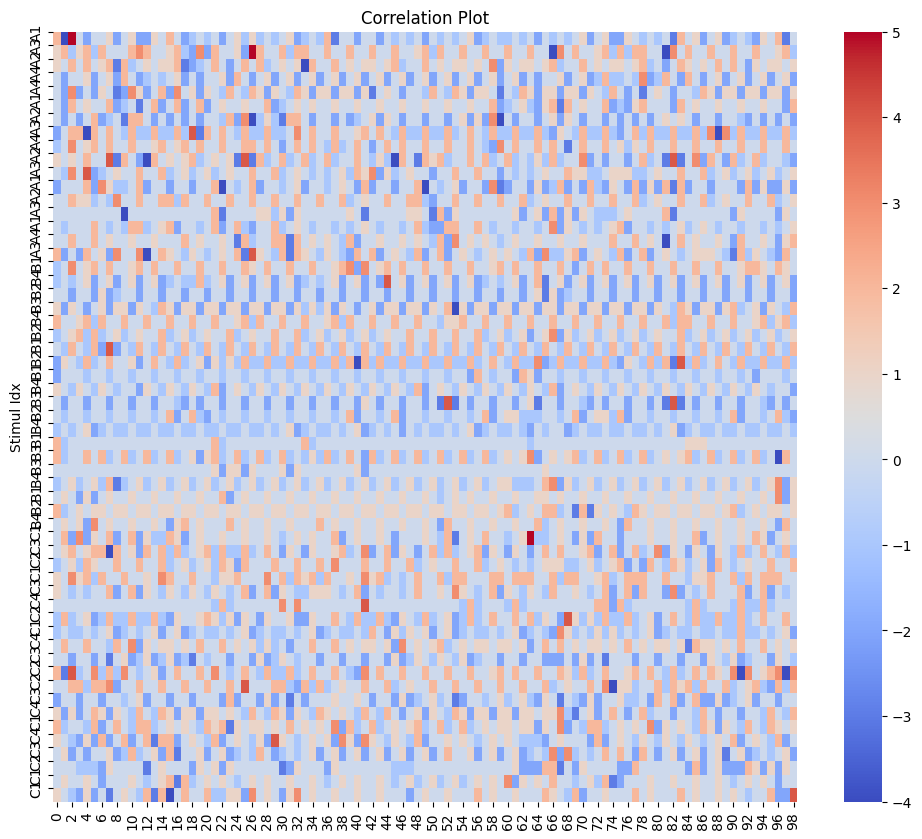

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(output_ex, cmap="coolwarm", annot=False)

plt.title("57 Repetitions Razer Headphones")    
plt.ylabel("Stimul Idx")

plt.yticks(np.arange(0, 57), result)  # Replace ... with your character descriptions

plt.title('Correlation Plot')
plt.show()

C:\Users\lkcep\AppData\Local\Temp\ipykernel_22192\2407654709.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


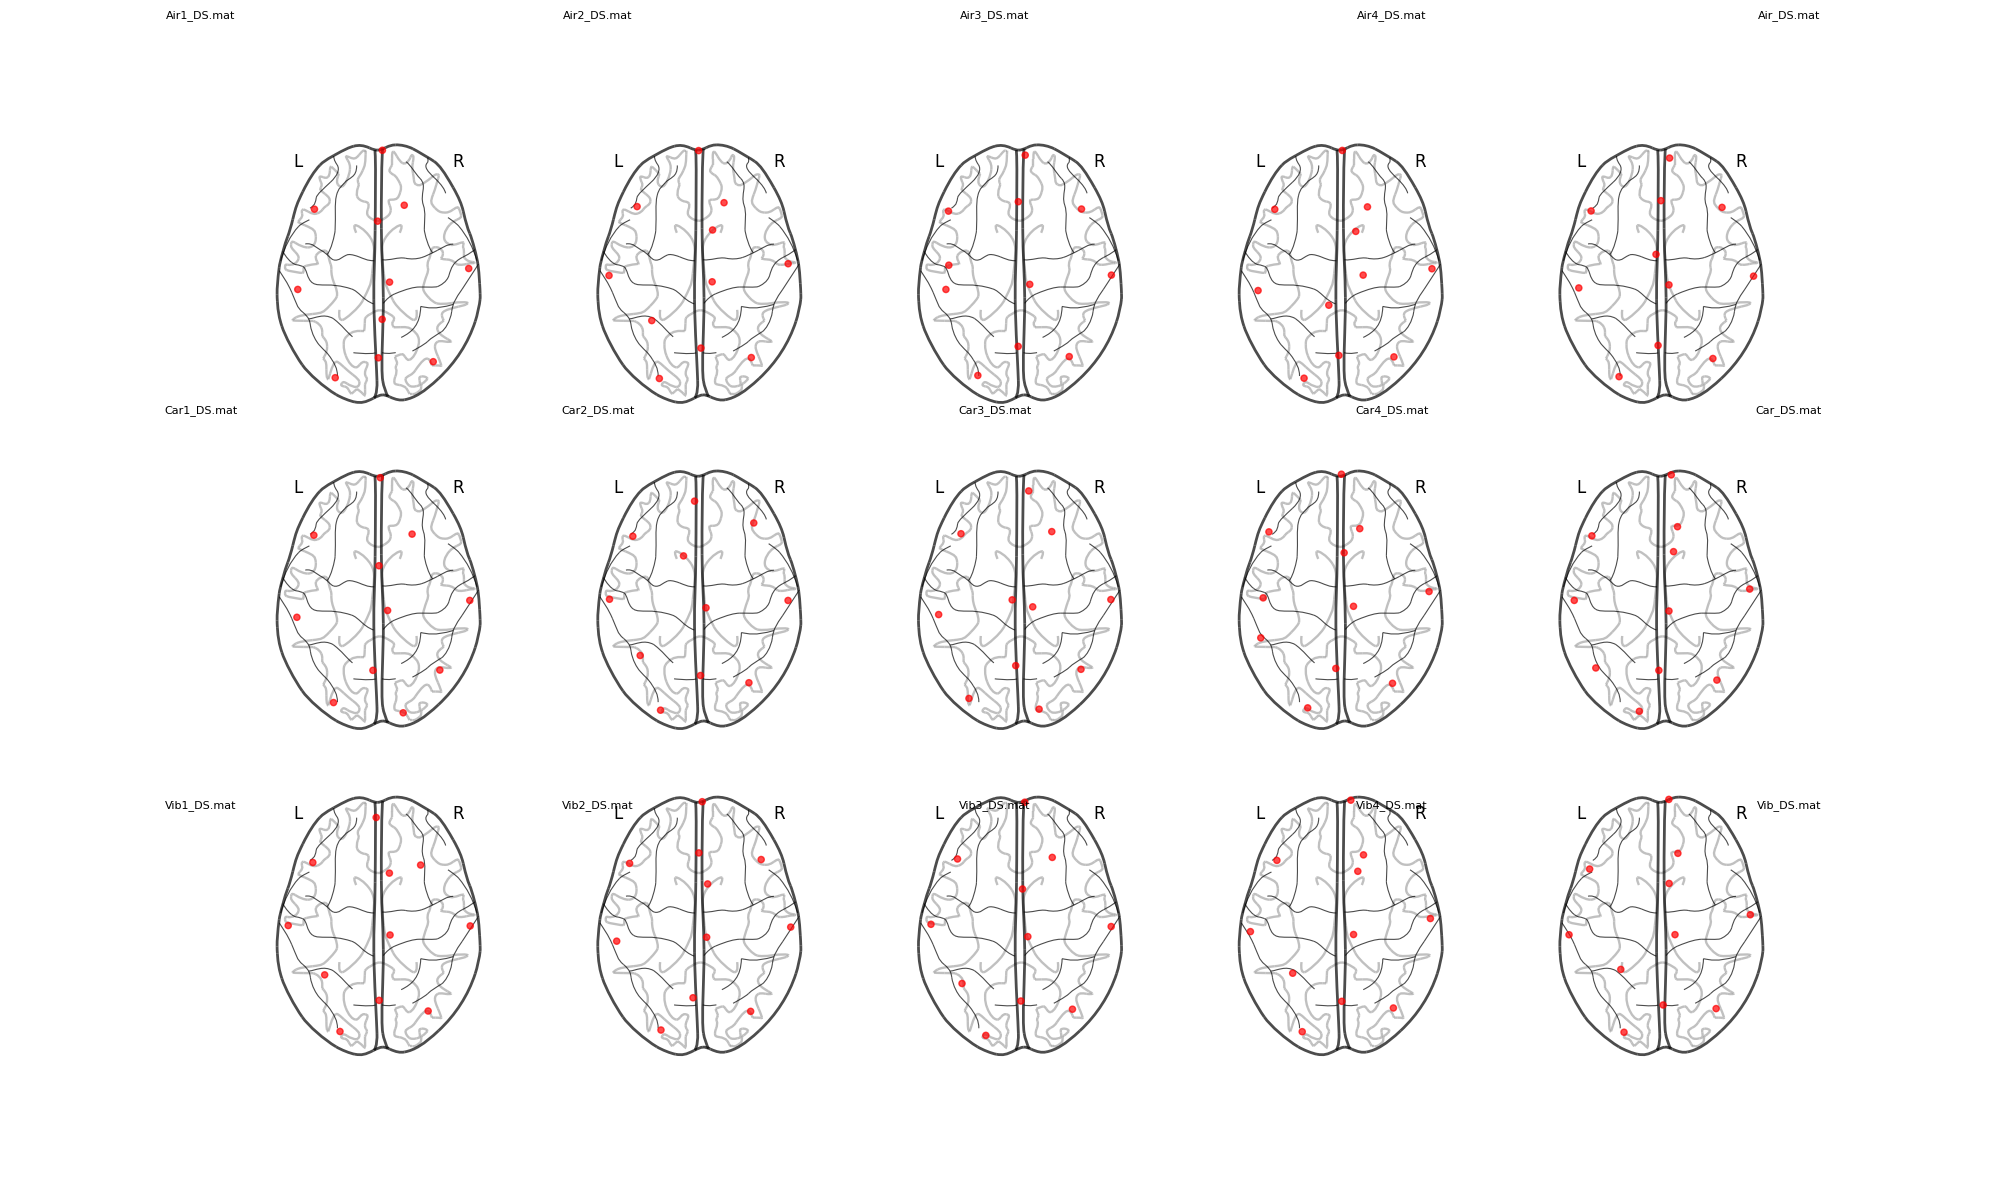

In [2]:
import numpy as np
import scipy.io
import os
from nilearn import plotting
import matplotlib.pyplot as plt

def tal2mni(inpoints):
    s1, s2 = inpoints.shape
    if s1 != 3:
        raise ValueError('Input must be a 3xN matrix')

    # Transformation matrices, different zooms above/below AC
    M2T = mni2tal_matrix()

    inpoints = np.vstack((inpoints, np.ones((1, s2))))

    tmp = inpoints[2, :] < 0  # 1 if below AC

    inpoints[:, tmp] = np.linalg.solve((M2T['rotn'] @ M2T['downZ']).T, inpoints[:, tmp])
    inpoints[:, ~tmp] = np.linalg.solve((M2T['rotn'] @ M2T['upZ']).T, inpoints[:, ~tmp])

    outpoints = inpoints[:3, :]
    
    return outpoints

def mni2tal_matrix():
    M2T = {}

    # rotn  = spm_matrix([0 0 0 0.05]); % similar to Rx(eye(3),-0.05), DLW
    M2T['rotn'] = np.array([
        [1, 0, 0, 0],
        [0, 0.9988, 0.0500, 0],
        [0, -0.0500, 0.9988, 0],
        [0, 0, 0, 1]
    ])

    # upz   = spm_matrix([0 0 0 0 0 0 0.99 0.97 0.92]);
    M2T['upZ'] = np.array([
        [0.9900, 0, 0, 0],
        [0, 0.9700, 0, 0],
        [0, 0, 0.9200, 0],
        [0, 0, 0, 1]
    ])

    # downz = spm_matrix([0 0 0 0 0 0 0.99 0.97 0.84]);
    M2T['downZ'] = np.array([
        [0.9900, 0, 0, 0],
        [0, 0.9700, 0, 0],
        [0, 0, 0.8400, 0],
        [0, 0, 0, 1]
    ])

    return M2T


# Create a 3x4 subplot grid
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

# Specify the directory path
directory_path = r'D:\shared_git\MaestriaThesis\results\pp03\eeglabStudy\MatlabDS'

# List all files in the directory
file_list = os.listdir(directory_path)

# Filter for .mat files
mat_files = [file for file in file_list if file.endswith('.mat')]
a = [1,1,1,1,1,1,1,1,1,1,1] #np.arange(0,15)
# Loop through each .mat file
for idx, mat_file in enumerate(mat_files):
    mat_file_path = os.path.join(directory_path, mat_file)
    # Load the MATLAB .mat file
    mat_data = scipy.io.loadmat(mat_file_path)
    locs_data = mat_data['DataStruct']['locs']  # Exclude the first row
    dmn_coords = locs_data[0][0][1:, :] #[(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
    # Plot in the current subplot
    ax = axes[idx // 5, idx % 5]
    # Set smaller and centered title without '_loc.mat' part
    title = mat_file.replace('_locs.mat', '')
    plotting.plot_markers(a,dmn_coords, node_size = 20, node_cmap = 'brg', axes = ax, display_mode = 'z', colorbar = False)
    ax.set_title(title, fontsize=8, ha='center')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# Read the CSV file into the DataFrame
df = pd.read_csv(r'D:\shared_git\MaestriaThesis\results\pp03\eeglabStudy\output_mat.csv')

# Rename the first four columns
new_column_names = ['channels', 'ID', 'Type', 'Epoch']
df.rename(columns=dict(zip(df.columns[:4], new_column_names)), inplace=True)

filtered_class_labels = df[df['channels'] == 5]
filtered_class_labels = filtered_class_labels.drop(columns=['ID'])
filtered_class_labels = filtered_class_labels.drop(columns=['channels', 'Epoch'])
filtered_class_labels = filtered_class_labels.reset_index(drop=True)

# Extract the next 1000 columns as an array
data_array = filtered_class_labels.iloc[:, 4:].values
class_labels = filtered_class_labels.iloc[:,0]
print(class_labels)

0        1
1        1
2        1
3        1
4        1
        ..
6919    12
6920    12
6921    12
6922    12
6923    12
Name: Type, Length: 6924, dtype: int64


In [14]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, resample

# Define bandpass filter parameters
lowcut = 2.0  # Low cutoff frequency in Hz
highcut = 30.0  # High cutoff frequency in Hz
fs_original = 250.0  # Original sampling frequency in Hz
fs_downsampled = 60  # Target downsampled frequency in Hz

# Design bandpass filter
nyquist = 0.5 * fs_original
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')

# Apply bandpass filter to data_array
filtered_data_array = np.apply_along_axis(lambda x: filtfilt(b, a, x), axis=1, arr=data_array)

# Downsample to the target frequency
downsample_factor = int(fs_original / fs_downsampled)
downsampled_data_array = resample(filtered_data_array, len(filtered_data_array[0]) // downsample_factor, axis=1)


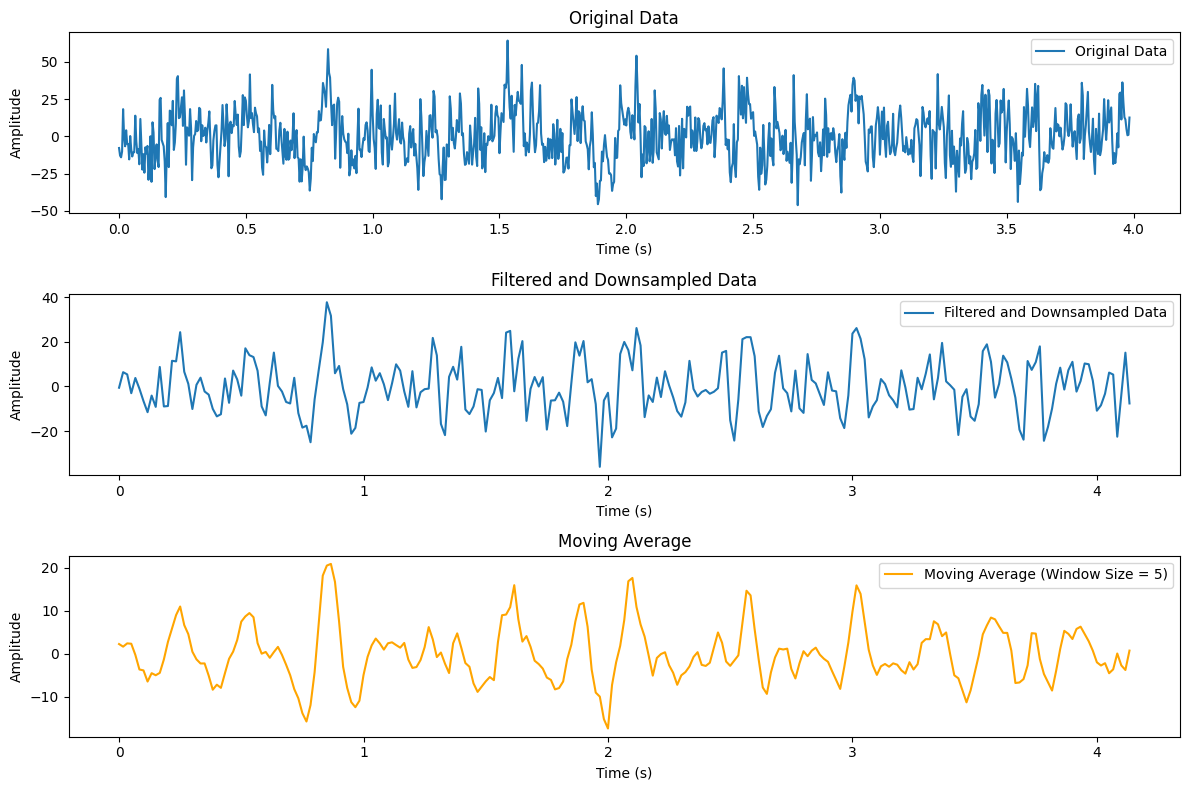

In [15]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, resample
import matplotlib.pyplot as plt

# Assuming you have class labels and data array from the previous code
# ...

# Select one row for plotting (change the row_index accordingly)
row_index = 0
original_row = data_array[row_index, :]
filtered_row = filtered_data_array[row_index, :]
downsampled_row = downsampled_data_array[row_index, :]

# Apply moving average to the downsampled row
window_size = 10
moving_average_row = np.convolve(downsampled_row, np.ones(window_size)/window_size, mode='same')

# Time axis for the original row
time_original = np.arange(0, len(original_row)) / fs_original

# Time axis for the downsampled row
time_downsampled = np.arange(0, len(downsampled_row)) / fs_downsampled

# Time axis for the moving average row
time_moving_average = np.arange(0, len(moving_average_row)) / fs_downsampled

# Plot the original, filtered, downsampled, and moving average rows
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time_original, original_row, label='Original Data')
plt.title('Original Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_downsampled, downsampled_row, label='Filtered and Downsampled Data')
plt.title('Filtered and Downsampled Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_moving_average, moving_average_row, label=f'Moving Average (Window Size = {window_size})', color='orange')
plt.title('Moving Average')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# Create a DataFrame with the downsampled data and class labels
combined_df = pd.concat([class_labels, pd.DataFrame(downsampled_data_array)], axis=1)

print(combined_df)

      Type          0          1          2           3          4          5  \
0        1  -0.566684   6.400093   5.404850   -3.019546   3.798764  -0.994137   
1        1  13.892585  31.520809  24.239059   26.591599  33.035642   8.424307   
2        1   7.090871  16.176860 -24.589857  -42.406479 -74.690366 -34.691013   
3        1  -9.040403   4.891928  12.415366   15.203384  -1.273530 -20.047200   
4        1   0.995053  -0.097663  -8.601772   -6.389372  -6.386539  -3.125807   
...    ...        ...        ...        ...         ...        ...        ...   
6919    12  -0.857070  43.984024  66.761900   46.012060  -3.372146 -16.695539   
6920    12  -6.617663  -2.786899   5.452942   -1.773076   1.619227 -18.082221   
6921    12  -2.911770  12.729326  21.705496   15.485513  15.352719  22.685510   
6922    12   9.413103  45.139768  64.916749  105.739301  65.552223 -12.037779   
6923    12   3.940385   6.779815  19.287770   -4.640220 -11.244363  12.602171   

              6          7 

In [28]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features (X) and target variable (y)
X = downsampled_data_array  # Assuming the downsampled data starts from the 5th column
y = class_labels.values  # Assuming 'channels' is the target variable

# Reshape y to a 1-dimensional array
y = y.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN model with k=5 (you can adjust the value of k)
knn_model = KNeighborsClassifier(n_neighbors=12)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 9.46%


In [31]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute mutual information scores
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Display mutual information scores for each feature
for feature, score in zip(range(X_train.shape[1]), mutual_info_scores):
    print(f"Feature index: {feature}, Mutual Information Score: {score}")

# Choose a threshold for feature selection based on mutual information
threshold = 0.0001  # You can adjust this threshold based on your preference

# Select features above the threshold
selected_features = np.where(mutual_info_scores > threshold)[0]

# Subset the original data with the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train a model using the selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy * 100:.2f}%")

Feature index: 0, Mutual Information Score: 0.015799151123981225
Feature index: 1, Mutual Information Score: 0.0
Feature index: 2, Mutual Information Score: 0.0
Feature index: 3, Mutual Information Score: 0.0
Feature index: 4, Mutual Information Score: 0.0016837150471236129
Feature index: 5, Mutual Information Score: 0.0
Feature index: 6, Mutual Information Score: 0.0004914095385801787
Feature index: 7, Mutual Information Score: 0.0
Feature index: 8, Mutual Information Score: 0.0
Feature index: 9, Mutual Information Score: 0.0
Feature index: 10, Mutual Information Score: 0.0
Feature index: 11, Mutual Information Score: 0.008658653531540494
Feature index: 12, Mutual Information Score: 0.004609820115979435
Feature index: 13, Mutual Information Score: 0.0
Feature index: 14, Mutual Information Score: 0.001103236184332168
Feature index: 15, Mutual Information Score: 0.011295830648011762
Feature index: 16, Mutual Information Score: 0.0
Feature index: 17, Mutual Information Score: 0.003285911

In [32]:
# Initialize the k-NN model with k=5 (you can adjust the value of k)
knn_model = KNeighborsClassifier(n_neighbors=12)

# Fit the model on the training data
knn_model.fit(X_train_selected, y_train)

# Predict the labels for the test set
y_pred = knn_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 8.74%


In [24]:
import numpy as np

# Assuming X_train is your feature matrix (a NumPy array)
correlation_matrix = np.corrcoef(X_train, rowvar=False)
upper_triangle = np.triu(correlation_matrix, k=1)
to_drop = np.where(np.abs(upper_triangle) > 0.9)
columns_to_drop = set()

for row, col in zip(*to_drop):
    columns_to_drop.add(row if np.abs(correlation_matrix[row, row]) > np.abs(correlation_matrix[col, col]) else col)

X_train_selected = np.delete(X_train, list(columns_to_drop), axis=1)

In [23]:
import numpy as np

# Assuming X_train is your feature matrix (a NumPy array)
correlation_matrix = np.corrcoef(X_train, rowvar=False)
upper_triangle = np.triu(correlation_matrix, k=1)
to_drop = np.where(np.abs(upper_triangle) > 0.9)
columns_to_drop = set()

for row, col in zip(*to_drop):
    columns_to_drop.add(row if np.abs(correlation_matrix[row, row]) > np.abs(correlation_matrix[col, col]) else col)

# Identify selected and dropped features
all_features = np.arange(X_train.shape[1])
selected_features = np.setdiff1d(all_features, list(columns_to_drop))

# Use the selected_features array as an index to get the selected columns
X_train_selected = X_train[:, selected_features]

# Use the columns_to_drop set to get the dropped features
dropped_features = np.array(list(columns_to_drop))

print("Selected Features:", selected_features)
print("Dropped Features:", dropped_features)

Selected Features: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

In [26]:
from sklearn.feature_selection import SelectPercentile, f_classif

# Assuming X_train and y_train are your training data
selector = SelectPercentile(f_classif, percentile=10)  # Choose the percentile you want to keep
X_train_selected = selector.fit_transform(X_train, y_train)

# Identify selected and dropped features
all_features = np.arange(X_train.shape[1])
selected_features = np.setdiff1d(all_features, list(columns_to_drop))

# Use the selected_features array as an index to get the selected columns
X_train_selected = X_train[:, selected_features]

# Use the columns_to_drop set to get the dropped features
dropped_features = np.array(list(columns_to_drop))

print("Selected Features:", selected_features)
print("Dropped Features:", dropped_features)

Selected Features: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241